In [4]:
import pandas as pd
import numpy as np
data_file=("Cardiac_Outcomes.xlsx")
all_sheets=pd.read_excel(data_file,sheet_name=None)
#to access sheet by name in excel
Hospital_data=all_sheets['Hospitalization_Discharge']
Cardiac_data=all_sheets['CardiacComplications']
Response_data=all_sheets['Responsivenes']
Patient_data=all_sheets['PatientHistory']
lab_data=all_sheets['Labs']
Demography_data=all_sheets['Demography']
Patientpre_data=all_sheets['Patient_Precriptions']
print(data_file)

Cardiac_Outcomes.xlsx


# 51) Display a violin chart to show distribution of Pulse Rate against age.

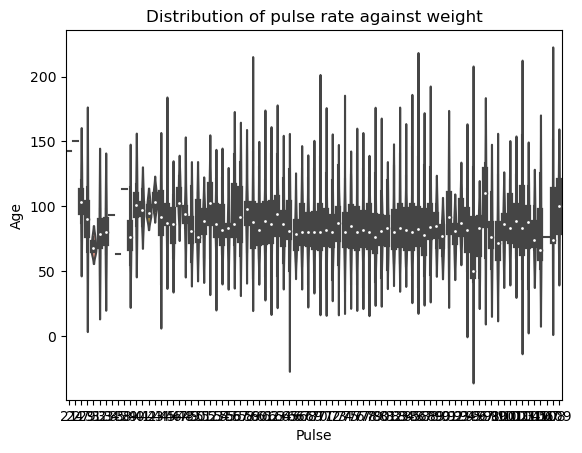

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
def Random_Age(age):
 return pd.Series(age.split("-", 1))
Demography_data[['Age1', 'Age2']] = Demography_data['ageCat'].apply(Random_Age)  
Demography_data['Age'] = [np.random.randint(s, e) for s,e in zip(Demography_data['Age1'], Demography_data['Age2'])]
merged=pd.merge(lab_data,Demography_data, on='inpatient_number')
#concated=pd.concat([lab_data,Demography_data],axis=1)
sns.violinplot(x='Age',y='pulse',data=merged)
plt.xlabel("Pulse")
plt.ylabel("Age")
plt.title("Distribution of pulse rate against weight")
plt.show()

# 52) Create a Point Plot on Age against time to readmission.

C:\Users\vidhy\anaconda3\Lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
C:\Users\vidhy\anaconda3\Lib\site-packages\numpy\lib\nanfunctions.py:1384: RuntimeWarning: All-NaN slice encountered
  return _nanquantile_unchecked(


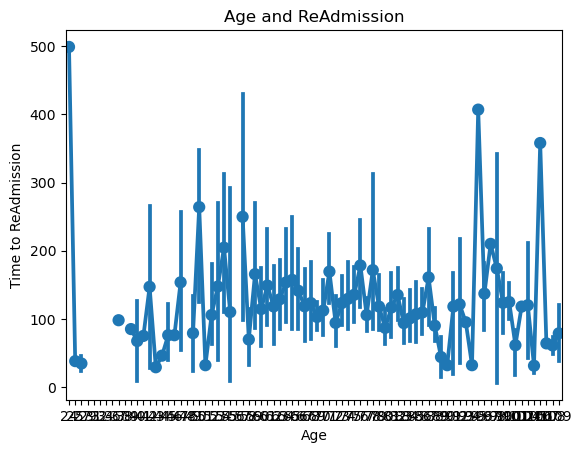

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
def Random_Age(age):
 return pd.Series(age.split("-", 1))
Demography_data[['Age1', 'Age2']] = Demography_data['ageCat'].apply(Random_Age)  
Demography_data['Age'] = [np.random.randint(s, e) for s,e in zip(Demography_data['Age1'], Demography_data['Age2'])]
del Demography_data['Age1']
del Demography_data['Age2']
merged=pd.merge(Hospital_data, Demography_data , on='inpatient_number')
sns.pointplot(x='Age',y='readmission_time_days_from_admission',data=merged)
plt.xlabel('Age')
plt.ylabel('Time to ReAdmission')
plt.title('Age and ReAdmission')
plt.show()


# 53) What is the correlation between CCI score and outcome?

In [10]:
from scipy.stats import pearsonr
from sklearn.preprocessing import LabelEncoder
merged=pd.merge(Hospital_data, Patient_data , on='inpatient_number')
merged=merged.replace([float('inf'), -float('inf')],pd.NA).dropna()
label=LabelEncoder()
merged['encoded']=label.fit_transform(merged['outcome_during_hospitalization'])
if len(merged['encoded'])>=2 and len(merged['CCI_score'])>=2:
   correlation,value=pearsonr(merged['encoded'],merged['CCI_score'])
   print('correlation',correlation)
else:
   print("Both arrays must have length atleast 2 to correlate")


Both arrays must have length atleast 2 to correlate


# 54) For all non-negative integers that are also even numbers in the array [0,1,2,6,8] print i*i

In [9]:
array=[0,1,2,6,8]
for i in array:
  if i%2==0:
    print("Non Negative Even Number:",i,' ',i*i)

Non Negative Even Number: 0   0
Non Negative Even Number: 2   4
Non Negative Even Number: 6   36
Non Negative Even Number: 8   64


# 55) Create a jointplot on diastolic_blood_pressure & length of stay

C:\Users\vidhy\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\vidhy\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


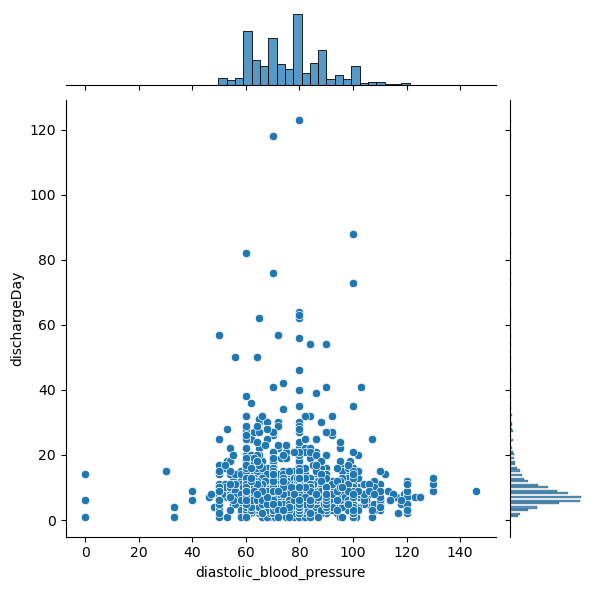

In [7]:
merged=pd.merge(Hospital_data, lab_data , on='inpatient_number')
sns.jointplot(x= merged['diastolic_blood_pressure'],y= merged['dischargeDay'])
plt.show()

# 56) Using loc, retrieve the agegroup and weight between indices 101 and 201.

In [8]:
Demography_data.loc[101:201,['ageCat','weight']]

,ageCat,weight
101,69-79,41.0
102,79-89,64.0
103,79-89,61.0
104,79-89,40.0
105,69-79,73.0
...,...,...
197,79-89,50.0
198,89-110,50.0
199,69-79,50.0
200,59-69,63.0
